In [1]:
import pandas as pd
import numpy as np
from scipy.sparse.csgraph import reverse_cuthill_mckee
from scipy.sparse import csr_matrix
import matplotlib.pylab as plt
import scipy.sparse as sps
name_bms1_csv = "Dataset Paper/BMS1.csv"
name_bms2_csv = "Dataset Paper/BMS2.csv"

In [2]:
# compute CSV file BMS1
file = open("Dataset Paper/BMS1_spmf.txt","r")
read = file.readlines()
lines = list()
for line in read:
    line = line.replace("-2","")
    line = line.replace(" ","")
    line = line[:-2]
    line = line.rstrip("-")
    line= line.replace("-1",",")    
    lines.append(line)
file.close()
file_write = open(name_bms1_csv,"w")
for line in lines:
    file_write.write(line+"\n")
file_write.close()

In [3]:
# BMS1
my_cols = [x for x in range(0,268)]
df = pd.read_csv(name_bms1_csv,names=my_cols,index_col=None ,engine='c',dtype='object')
df = df.where((pd.notnull(df)), None)
df_dummies = pd.get_dummies(df)
df_dummies = df_dummies.iloc[:6000]
# sum item with same number after _
columns = list()
for column in df_dummies.columns:
    for column_1 in df_dummies.columns:
        if(column != column_1 and column.split('_')[1] == column_1.split('_')[1] and column.split('_')[1] not in columns ):
            columns.append(column.split('_')[1])

# remove duplicate
columns = list(set(columns))  
zero_data = np.zeros(shape=(len(df_dummies),len(columns)))
df_new = pd.DataFrame(zero_data, columns=columns,dtype='uint8')
# qualcosa non val alcuni sono valori maggiori di 1
# create a transactional data
for column in df_dummies.columns:
    for column_1 in df_dummies.columns:
        if(column != column_1 and column.split('_')[1] == column_1.split('_')[1]):
            if(column.split('_')[0]=='0'):
                colonna_new  = column.split('_')[1]
                if(len(df_new.index[df_new[colonna_new] > 0].tolist())==0):
                    df_new[colonna_new]=df_new[colonna_new] + df_dummies[column] + df_dummies[column_1]
                else:
                    df_new[colonna_new] = df_new[colonna_new] + df_dummies[column_1]
                #print(df_new[colonna_new])
                
# ora bisogn aaggiungere len(df) -len(columns) item finti con vlori tutti 0 
# per avere una matrice quadrata (vedi paper)
len(columns)
# write item in a file
with open("Dataset Paper/lista_items_BMS1.txt","w") as f:
    for x in list(df_new.columns):
        f.write(str(x)+"\n")
df_new.to_csv("Dataset Paper/dataBMS1_transiction.csv",index=None,header=None)


In [4]:
# read file transiction
print(df_new.shape)
df_temp = pd.read_csv("Dataset Paper/dataBMS1_transiction.csv",header=None,index_col=None)
df_temp

(6000, 481)


,0,1,2,3,4,5,6,7,8,9,...,471,472,473,474,475,476,477,478,479,480
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
#READ FILE BMS2
file = open("Dataset Paper/BMS2.txt","r")
read = file.readlines()
lines = list()
for line in read:
    line = line.replace("-2","")
    line = line.replace(" ","")
    line = line[:-2]
    line = line.rstrip("-")
    line= line.replace("-1",",")
    lines.append(line)
file.close()
file_write = open(name_bms2_csv,"w")
for line in lines:
    file_write.write(line+"\n")
file_write.close()

In [ ]:
# BMS2
my_cols = [x for x in range(0,161)]
df = pd.read_csv(name_bms2_csv,names=my_cols,index_col=None ,engine='c',dtype= 'object')
df = df.where((pd.notnull(df)), None)
df_dummies = pd.get_dummies(df)
df_dummies = df_dummies[:10000]
# sum item with same number after _
columns = list()
for column in df_dummies.columns:
    for column_1 in df_dummies.columns:
        if(column != column_1 and column.split('_')[1] == column_1.split('_')[1] and column.split('_')[1] not in columns ):
            columns.append(column.split('_')[1])

# remove duplicate
columns = list(set(columns))  
zero_data = np.zeros(shape=(len(df_dummies),len(columns)))
df_new = pd.DataFrame(zero_data, columns=columns,dtype='uint8')
# qualcosa non val alcuni sono valori maggiori di 1
# create a transactional data
for column in df_dummies.columns:
    for column_1 in df_dummies.columns:
        if(column != column_1 and column.split('_')[1] == column_1.split('_')[1]):
            if(column.split('_')[0]=='0'):
                colonna_new  = column.split('_')[1]
                if(len(df_new.index[df_new[colonna_new] > 0].tolist())==0):
                    df_new[colonna_new]=df_new[colonna_new] + df_dummies[column] + df_dummies[column_1]
                else:
                    df_new[colonna_new] = df_new[colonna_new] + df_dummies[column_1]
                #print(df_new[colonna_new])
                
# ora bisogn aaggiungere len(df) -len(columns) item finti con vlori tutti 0 
# per avere una matrice quadrata (vedi paper)
len(columns)
# write item in a file
with open("Dataset Paper/lista_items_BMS2.txt","w") as f:
    for x in list(df_new.columns):
        f.write(str(x)+"\n")
        
df_new.to_csv("Dataset Paper/dataBMS2_transiction.csv",index=None,header=None)

In [ ]:
df_new

,12531,47289,46285,12687,18639,48635,18555,32209,12591,47957,...,18683,12855,47277,12671,12443,54653,12427,18411,12583,18511
8948,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
789,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15944,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
42208,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
55502,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
42577,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3354,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
51793,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35999,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23411,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


df_new_complete without RCM


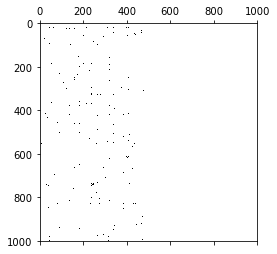

df_new_complete with RCM


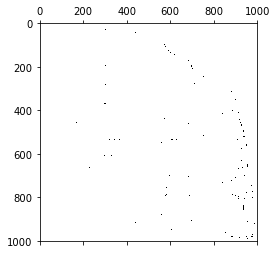

bw after RCM 563
bw first RCM 990


In [33]:
# compute dim_finale random (nel nostro caso ne prendo mille)
dim_finale = 1000
random_row = np.random.permutation(df.shape[0])[:dim_finale]
df_ridotto = df.iloc[random_row]
df_ridotto
columns = df_ridotto.columns
zero_data_to_add = np.zeros(shape=(len(df_ridotto),len(df_ridotto)-len(columns)))
# aggiungo li zero con la dimensione finale relativa
#zero_data_to_add.shape
columns_to_add = ["temp"+str(x) for x in range(0,len(df_ridotto)-len(columns))] 
#columns_to_add
df_to_add = pd.DataFrame(zero_data_to_add, columns=columns_to_add,index=df_ridotto.index,dtype='uint8')
#df_to_add
# creo il dataset completo aggiungendo tutti gli zeri che mancano
df_new_square = pd.concat([df_ridotto, df_to_add], axis=1)


# salvo i nomi
nomi_item = df_ridotto.columns
# rename all column name con numeri 
df_new_square.columns = [i for i in range(df_new_square.shape[1])]
df_new_square
sparse_complete = csr_matrix(df_new_square)
# RCM algorithm fro df_tuncate
order_complete = reverse_cuthill_mckee(sparse_complete)

# print(df_new_complete)
# print(len(df_new_complete),len(order_complete))

print("df_new_complete without RCM")
plt.spy(df_new_square)
plt.show()
print("df_new_complete with RCM")
plt.spy(df_new_square.iloc[order_complete][order_complete])
plt.show()

[i,j] = np.where(df_new_square.iloc[order_complete][order_complete] == 1)
bw = max(i-j) +1
print("bw after RCM " + str(bw))
[i,j] = np.where(df_new_square == 1)
bw = max(i-j) +1
print("bw first RCM " +str(bw))


In [ ]:
#DATAFRAME COMPLET --> matrix square
zero_data_to_add = np.zeros(shape=(len(df_dummies),len(df_dummies)-len(columns)))
columns_to_add = [x for x in range(0,len(df_dummies)-len(columns))] 
df_to_add = pd.DataFrame(zero_data_to_add, columns=columns_to_add,dtype='uint8')

# creo il dataset completo aggiungendo tutti gli zeri che mancano
df_new_complete = pd.concat([df_new, df_to_add], axis=1)
# rename all column name
df_new_complete.columns = [i for i in range(df_new_complete.shape[1])]
# for write in a file uncommented this line
# save dataset complete in 1000x1000

# df_new_complete.to_csv("data_complete.csv",header = False, index=False)

# compute RCM for matrix complete
sparse_complete = csr_matrix(df_new_complete)
# RCM algorithm fro df_tuncate
order_complete = reverse_cuthill_mckee(sparse_complete)

# print(df_new_complete)
# print(len(df_new_complete),len(order_complete))

print("df_new_complete without RCM")
plt.spy(df_new_complete)
plt.show()
print("df_new_complete with RCM")
plt.spy(df_new_complete.iloc[order_complete][order_complete])
plt.show()

[i,j] = np.where(df_new_complete.iloc[order_complete][order_complete] == 1)
bw = max(i-j) +1
print("bw after RCM " + str(bw))
[i,j] = np.where(df_new_complete == 1)
bw = max(i-j) +1
print("bw first RCM " +str(bw))
df_completed_reordered = df_new_complete.iloc[order_complete][order_complete]